In [0]:
import numpy as np  # Import numpy as np
from scipy import stats  # Import stats from scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
#import and read csv 
df = pd.read_csv(r"heart.csv")

In [0]:
#Our Dataset 
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
#Checking type of data types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [0]:
#Summary of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Cleaning

In [0]:
# Renaming specific columns 
df = df.rename(columns={
    'cp': 'Chest Pain',                                
    'trtbps': 'resting blood pressure',                                  
    'chol': 'cholestoral',                                  
    'fbs': 'fasting blood sugar',                              
    'restecg': 'resting electrocardiographic results',                               
    'thalachh': 'maximum heart rate achieved',             
                  
})

In [0]:
#Check for Duplicates 
df.duplicated().any()

True

In [0]:
#Print of the Duplicate values
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#Duplicate values found in row 164 

     age  sex  Chest Pain  resting blood pressure  ...  slp  caa  thall  output
164   38    1           2                     138  ...    2    4      2       1

[1 rows x 14 columns]


In [0]:
#Removal of the duplocate values and then print the result 
df.drop_duplicates(inplace=True)
#Duplicate values found in row 164 have successfully been removed 
df

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
# Check for missing values
df.isnull().any()

age                                     False
sex                                     False
Chest Pain                              False
resting blood pressure                  False
cholestoral                             False
fasting blood sugar                     False
resting electrocardiographic results    False
maximum heart rate achieved             False
exng                                    False
oldpeak                                 False
slp                                     False
caa                                     False
thall                                   False
output                                  False
dtype: bool

In [0]:
#Checking if all duplicates were dropped
df.duplicated().any()

False

# Data Analysis

In [0]:
print("Column names in the dataset:", df.columns)

Column names in the dataset: Index(['age', 'sex', 'Chest Pain', 'resting blood pressure', 'cholestoral',
       'fasting blood sugar', 'resting electrocardiographic results',
       'maximum heart rate achieved', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')


In [0]:
# Calculate and print mean values
print("Shape of the data (rows,columns):",df.shape)

chol_mean = df['cholestoral'].mean()
print(f"Mean Cholesterol: {chol_mean}")

age_mean = df['age'].mean()
print(f"Mean Age: {age_mean}")

trtbps_mean = df['resting blood pressure'].mean()
print(f"Mean for resting blood pressure: {trtbps_mean}")

thalachh_mean = df['maximum heart rate achieved'].mean()
print(f"Mean for the maximum heart rate achieved: {thalachh_mean}")

oldpeak_mean = df['oldpeak'].mean()
print(f"Mean oldpeak: {oldpeak_mean}")

Shape of the data (rows,columns): (302, 14)
Mean Cholesterol: 246.5
Mean Age: 54.420529801324506
Mean for resting blood pressure: 131.60264900662253
Mean for the maximum heart rate achieved: 149.56953642384107
Mean oldpeak: 1.0430463576158941


In [0]:
# Calculate and print median values
chol_median = df['cholestoral'].median()
print(f"Median Cholesterol: {chol_median}")

age_median = df['age'].median()
print(f"Median Age: {age_median}")

trtbps_median = df['resting blood pressure'].median()
print(f"Median for resting blood pressure: {trtbps_median}")

thalachh_median = df['maximum heart rate achieved'].median()
print(f"Median for the maximum heart rate achieved: {thalachh_median}")

oldpeak_median = df['oldpeak'].median()
print(f"Median oldpeak: {oldpeak_median}")

Median Cholesterol: 240.5
Median Age: 55.5
Median for resting blood pressure: 130.0
Median for the maximum heart rate achieved: 152.5
Median oldpeak: 0.8


In [0]:
# Calculate and print mode values
chol_mode = df['cholestoral'].mode()[0]  # Use the first mode value
print(f"Mode Cholesterol: {chol_mode}")

age_mode = df['age'].mode()[0]
print(f"Mode Age: {age_mode}")

trtbps_mode = df['resting blood pressure'].mode()[0]
print(f"Mode for resting blood pressure: {trtbps_mode}")

thalachh_mode = df['maximum heart rate achieved'].mode()[0]
print(f"Mode for the maximum heart rate achieved: {thalachh_mode}")


Mode Cholesterol: 197
Mode Age: 58
Mode for resting blood pressure: 120
Mode for the maximum heart rate achieved: 162


In [0]:
# Calculate and print Variance values
chol_var = df['cholestoral'].var()
print(f"Variance for Cholesterol: {chol_var}")

age_var = df['age'].var()
print(f"Variance for age: {age_var}")

trtbps_var = df['resting blood pressure'].var()
print(f"Variance for resting blood pressure: {trtbps_var}")

thalachh_var = df['maximum heart rate achieved'].var()
print(f"Variance for the maximum heart rate achieved: {thalachh_var}")

oldpeak_var = df['oldpeak'].var()
print(f"Variance for oldpeak: {oldpeak_var}")

Variance for Cholesterol: 2678.423588039867
Variance for age: 81.86575652900926
Variance for resting blood pressure: 308.4728168797166
Variance for the maximum heart rate achieved: 524.5715605817254
Variance for oldpeak: 1.3489714197707423


In [0]:
# Calculate and print Standard deviation values
chol_std = df['cholestoral'].std()
print(f"Standard deviation for Cholesterol: {chol_std}")

age_std = df['age'].std()
print(f"Standard deviation for age: {age_std}")

trtbps_std = df['resting blood pressure'].std()
print(f"Standard deviation for resting blood pressure: {trtbps_std}")

thalachh_std = df['maximum heart rate achieved'].std()
print(f"Standard deviation for the maximum heart rate achieved: {thalachh_std}")

oldpeak_std = df['oldpeak'].std()
print(f"Standard deviation for oldpeak: {oldpeak_std}")

Standard deviation for Cholesterol: 51.75348865574056
Standard deviation for age: 9.047969746247457
Standard deviation for resting blood pressure: 17.56339423003756
Standard deviation for the maximum heart rate achieved: 22.903527251969845
Standard deviation for oldpeak: 1.1614522890634562


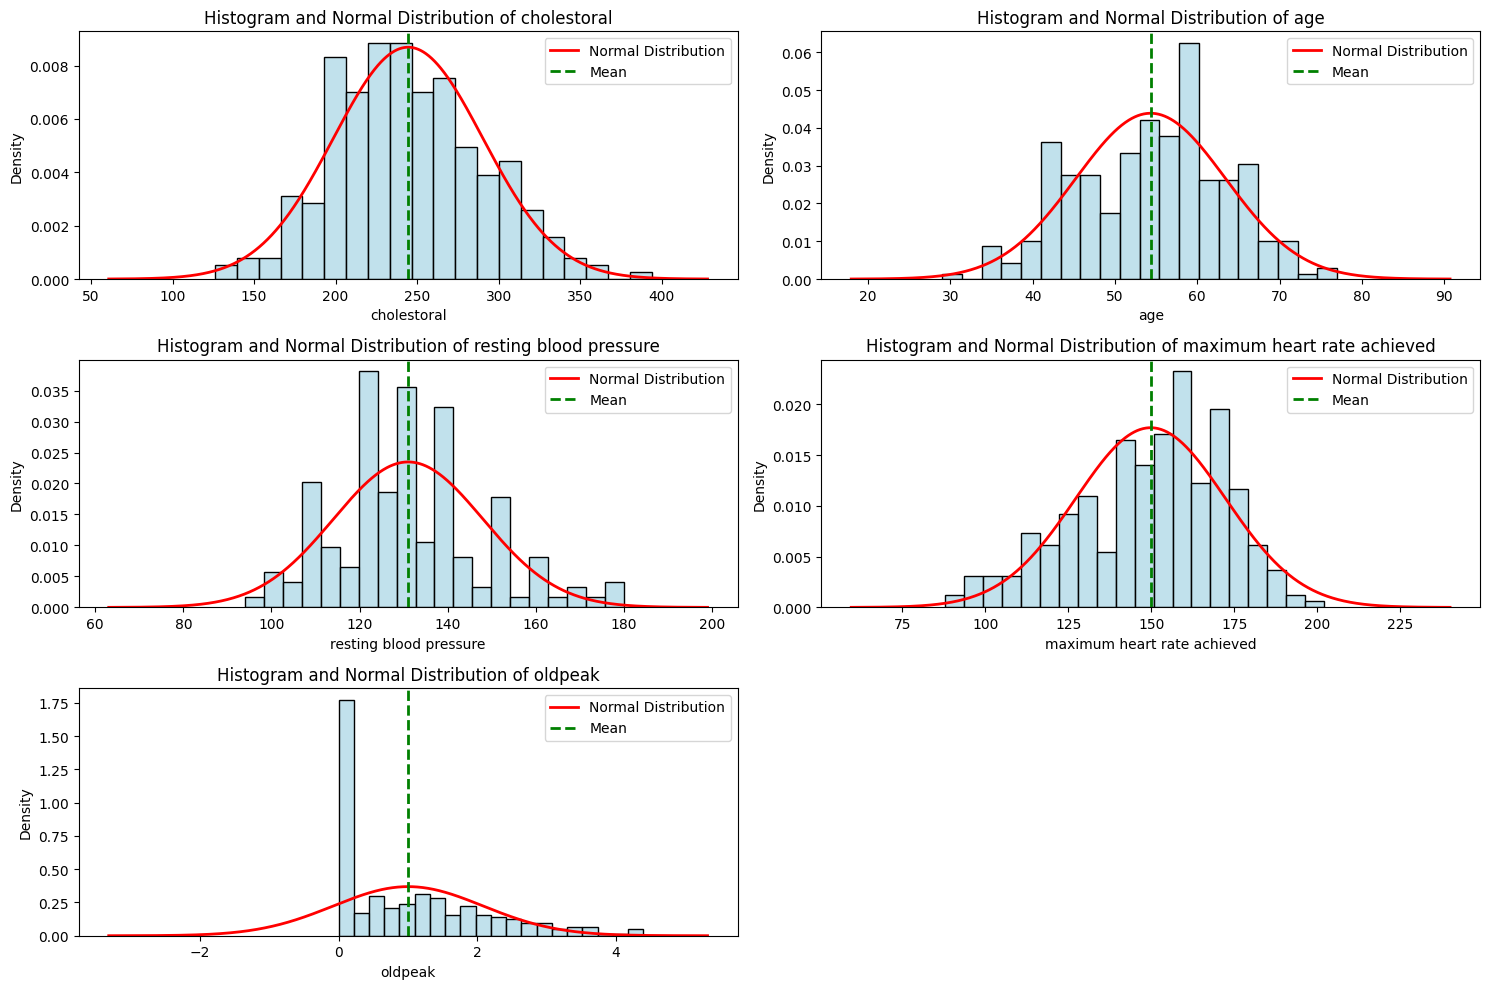

In [0]:
# Clean the DataFrame by removing outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Define the columns to analyze
columns_to_analyze = ['cholestoral', 'age', 'resting blood pressure', 'maximum heart rate achieved', 'oldpeak']

# Create plots for normal distribution
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_analyze, 1):
    # Calculate mean and standard deviation
    mean = df_cleaned[column].mean()
    std_dev = df_cleaned[column].std()

    # Generate data points for the normal distribution
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)

    # Plotting
    plt.subplot(3, 2, i)
    sns.histplot(df_cleaned[column], bins=20, kde=False, stat='density', color='lightblue', edgecolor='black')
    plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)
    plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
    plt.title(f'Histogram and Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Machine Learning

In [0]:
#Validation of dataset
array = df_cleaned.values
X = array[:, 0:12]
Y = array[:, 12]
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
# Creating a list of models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

# Evaluate each model in turn
results = []
names = []
validation_size = 0.20
seed = 7
scoring = 'accuracy'  # Specify your scoring metric

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_validation)  # If needed for test set

# Use the scaled data for training
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.699012 (0.067472)
LDA: 0.699012 (0.077877)
KNN: 0.650791 (0.084144)


##### Linear Regression: ~70% of predictions were correct on average across folds

##### LinearDiscriminantAnalysis: Same as Linear Regression, but slightly more variable across folds

##### KNeighborsClassifier:~65% accuracy, with more fluctuation between folds